# Pynams: A Python Package for Nominally Anhydrous Minerals
Here are some examples for how to process FTIR spectra to estimate hydrogen contents and perform basic diffusion modeling with pynams.  


## Get pynams and basic python scientific and plotting packages
pynams should work with either python 2.7 or 3.

For those new to python, I recommend downloading [anaconda](https://www.continuum.io/downloads). If you are used to Matlab, check out [spyder](https://pythonhosted.org/spyder/), which comes with anaconda. 

Once you have python installed, download [pynams](https://github.com/EFerriss/pynams) and install it by going into the Pynams folder on your command line and typing 'python setup.py install'. After that you should be able to follow along with the code below anywhere you can run a python script.

The plotting package in python is called matplotlib. This first line is just to make the plots show up correctly here.  
The second line will let us use some special plotting commands for fiddling with figures later on.  
The third line makes my python 2.7 code more compatible with python 3.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import print_function, division

## Create your Spectrum
I assume you have your own spectrum saved as a **CSV** file to play with. If not, there are a couple in the pynams folder.

In [43]:
from pynams import Spectrum
FTIR_file_location = 'C:\\Users\\Ferriss\\Documents\\FTIR\\'
spectrum = Spectrum(fname='test', folder=FTIR_file_location, thickness_microns=268.)

## Plot spectra

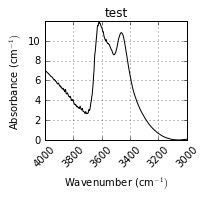

In [44]:
fig, ax = spectrum.plot_spectrum()

Next we'll plot two spectra on top of each other. 

You'll want those lines to look different. You can pass in a dictionary of style terms in through the keyword style (see example below). There are several premade style dictionaries in the pynams module styles, so we're going to import that too.

The keyword offset moves your spectrum up and down by the specified amount.

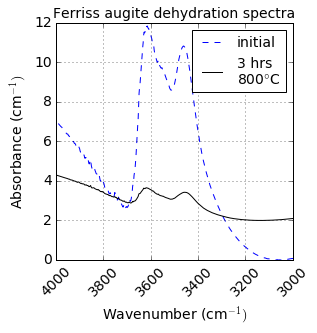

In [45]:
# Making second spectrum called spectrum2 the same way as spectrum above
spectrum2 = Spectrum(fname = 'pynamsDemo2', thickness_microns = 876.4, folder=FTIR_file_location)

# A larger plot with two spectra and a legend
from pynams import styles
fig, ax = spectrum.plot_spectrum(style=styles.style_initial, label='initial')
spectrum2.plot_spectrum(axes=ax, style=styles.style_1, label='3 hrs\n800$\degree$C', offset=2.)
fig.set_size_inches(5, 5)

# the y-axis limits should be set to whatever is appropriate for your spectra
ax.set_ylim(0, 12.)

ax.set_title('Ferriss augite dehydration spectra', fontsize=14)
hleg = ax.legend(loc=1, fontsize=14) 

# change font sizes
# this line is why we imported matplotlib.pyplot at the beginning
plt.tick_params(axis='both', which='major', labelsize=14) 

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

## Make baselines
The default is a line between wavenumbers 3200 and 3700 cm-1, but you can also make quadratic baselines (linetype='quadratic') or cubic splines (linetype='spline'; these can take awhile to run) and change the wavenumber range. Here are some examples:

First the default linear baseline.

Making the default linear baseline.
Use Spectrum.make_baseline for other baselines.


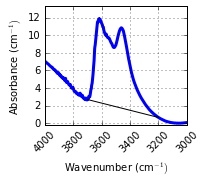

In [46]:
fig, ax = spectrum.plot_showbaseline()

Next, a quadratic line. 

The wavenumber range of the baseline is set by the keywords wn_high and wn_low, which default to 3700 and 3200 cm-1.

The keyword force_quadratic_though_wn will force a fit though quadratic line through the curve at that wavenumber.

Or tell it how much to shift the quadrtic curve away from being a line using the curvature keyword. 

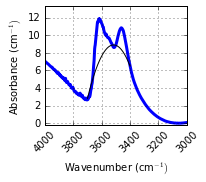

In [47]:
spectrum.make_baseline(force_quadratic_through_wn=3500, wn_low=3400)
fig, ax = spectrum.plot_showbaseline()

fitting x values: [ 3700.789  3550.     3000.744]
fitting y values: [ 2.69764925  1.43307157  0.0765709 ]


(0, 15)

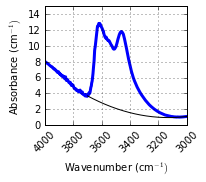

In [48]:
spectrum.make_baseline(curvature=0.7, wn_low=3000, show_fit_values=True, show_plot=False)
fig, ax = spectrum.plot_showbaseline(offset=1)
ax.set_ylim(0, 15)

## Subtract the baseline

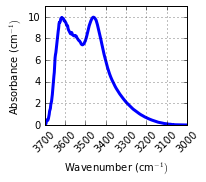

In [49]:
fig, ax = spectrum.plot_subtractbaseline()

## Get the area under the curve

In [50]:
spectrum.get_area_under_curve();

test
area: 2743.3 /cm^2


## Get a very rough estimate of the water content
Defaults are phase='cpx', calibration='Bell', and scaling_factor (how much to multiply the resulting water concentration by to account for areas in spectra in different direction that weren't measured) of 3.

These results are not really to be trusted, but will give you a very rough estimate. See, e.g., Rossman 2006 review.

The reported errors are based *only* on propagated error from the absorption coefficients and do not include the large (30%?) uncertainties associated with baseline choice and the potentially even larger errors associated with using unpolarized radiation (Withers 2013).

In [51]:
water = spectrum.water(printout=True, phase='olivine', calibration='Withers', scaling_factor=2.1)

test
water: 326.4+/-16.5 ppm H2O
 *2.1 = 979.3+/-49.4 ppm H2O


## Estimate the thickness of an olivine in microns
This method is for transmission FTIR spectra and uses Eq 1 of Matveev and Stachel 2007. For reflectance spectra, see Wysoczanski and Tani 2006.    

In [52]:
spectrum = Spectrum(folder=FTIR_file_location, fname='testolivine1')
spectrum.get_thickness_from_SiO()

363.44495111551583


# Profiles!

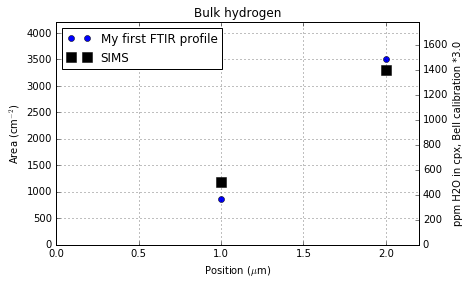

In [53]:
from pynams import Profile

# make the profile
# fnames and folder described for spectra above.
# If length_microns is not included, the length of the profile is assumed to be 
# the longest value in positions_microns + 10%
profile = Profile(profile_name='My first FTIR profile', 
                  fnames=['pynamsDemo2', 'test'], 
                  folder=FTIR_file_location, 
                  thicknesses_microns=200., 
                  positions_microns=[1., 2.])

# make the baselines. Keywords are the same as in spectrum.make_baseline() above
profile.make_baselines(curvature=0.7, wn_low=3000)

# plot the profile area
# The same warnings and keywords apply as above for Spectrum.water()
fig, ax, ax_water = profile.plot_area_profile(show_water_ppm=True, centered=False, phase='cpx',
                                              calibration='Bell', scaling_factor=3.)

# Now let's add your lovely SIMS data
# Note that I'm plotting on ax_water. If you use ax, the SIMS data plots on the left axis. 
SIMS_data = [500, 1400]
ax_water.plot(profile.positions_microns, SIMS_data, 'sk', markersize=10, label='SIMS')
ax.legend(loc=2);


## Average all the spectra across the profile

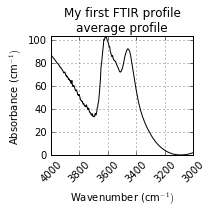

In [54]:
avespec = profile.average_spectra()
avespec.get_thickness_from_SiO()
fig, ax = avespec.plot_spectrum()

## Thickness across an olivine profile

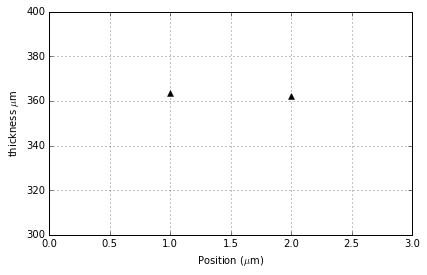

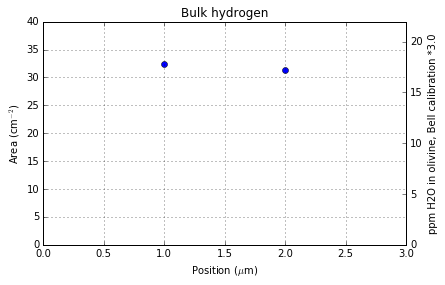

In [55]:
profile2 = Profile(profile_name='thicknesses from Si-O overtones', 
                   fnames=['testolivine1', 'testolivine2'], 
                   folder=FTIR_file_location, 
                   positions_microns=[1., 2.])
profile2.get_thicknesses_from_SiO()

fig, ax, ax_water = styles.plot_area_profile_outline(show_water_ppm=False)
ax.set_ylabel('thickness $\mu$m')
ax.plot(profile2.positions_microns, profile2.thicknesses_microns, '^k')
ax.set_ylim(300, 400)
ax.set_xlim(0, 3)

profile2.make_baselines(curvature=0.1)
fig, ax, ax_water = profile2.plot_area_profile(centered=False)
ax.set_ylim(0, 40)
ax.set_xlim(0, 3);


# On multiple baselines
Perhaps you want to make a baseline and then not have to re-make it every time you want to plot the areas. Perhaps you are using different baselines to come up with rough peak-specific area profiles. Perhaps you want a sense for the range of the calculated area given different baselines. You need a way to handle multiple sets of baselines.

## Save a baseline

(<matplotlib.figure.Figure at 0x9ec9da0>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb98d0f0>)

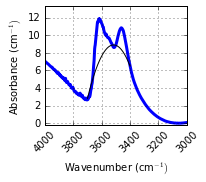

In [56]:
spectrum = Spectrum(fname='test', folder=FTIR_file_location, thickness_microns=268.)

# make, show, and save quadratic baseline
spectrum.make_baseline(force_quadratic_through_wn=3500, wn_low=3400)
spectrum.plot_showbaseline()
#spectrum.save_baseline(folder=FTIR_file_location)

Saved C:\Users\Ferriss\Documents\FTIR\test-linearbaseline


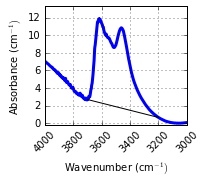

In [57]:
# make a linear baseline and save it under a different name
spectrum.make_baseline()
spectrum.plot_showbaseline()
spectrum.save_baseline(folder=FTIR_file_location, baseline_ending='-linearbaseline')

## Get saved baselines

Got baseline C:\Users\Ferriss\Documents\FTIR\test-baseline.CSV


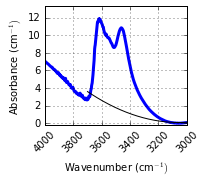

In [58]:
spectrum.get_baseline(folder=FTIR_file_location)
fig, ax = spectrum.plot_showbaseline()

Got baseline C:\Users\Ferriss\Documents\FTIR\test-linear-baseline.CSV


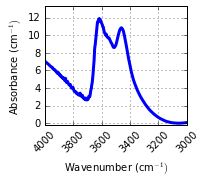

In [59]:
spectrum.get_baseline(folder=FTIR_file_location, baseline_ending='-linear-baseline.CSV')
fig, ax = spectrum.plot_showbaseline()

## Save and retrieve all baselines in a profile

In [60]:
profile.save_baselines(folder=FTIR_file_location)

Saved C:\Users\Ferriss\Documents\FTIR\pynamsDemo2-baseline.CSV
Saved C:\Users\Ferriss\Documents\FTIR\test-baseline.CSV


In [61]:
profile.get_baselines(folder=FTIR_file_location)

Got baseline C:\Users\Ferriss\Documents\FTIR\pynamsDemo2-baseline.CSV
Got baseline C:\Users\Ferriss\Documents\FTIR\test-baseline.CSV


## Guess the orientation of an olivine
Lemaire et al. 2004 Figure 1 shows typical O-H stretches and 2nd order Si-O overtones for FTIR spectra for olivine with light polarized in different directions. spectrum.orientation(), produces a plot zoomed in on the relevant Si-O peaks with labeled lines for the major peaks shown in the Lemaire figure. This example is probably oriented with the electric vector || c.

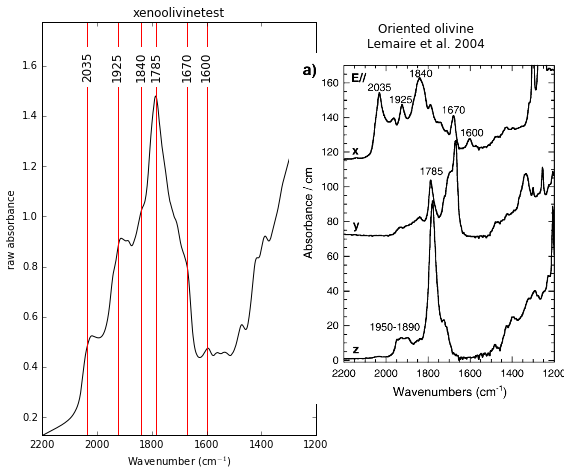

In [62]:
spectrum = Spectrum(folder=FTIR_file_location, fname='xenoolivinetest', thickness_microns=300.)
fig = spectrum.orientation()
fig.set_size_inches(8, 8)

## Locate peaks

peaks found at the following wavenumbers:
[ 3230.318  3328.674  3357.602  3432.815  3525.386  3573.599  3633.385]
change sensitivity to find more or fewer peaks


[16, 67, 82, 121, 169, 194, 225]

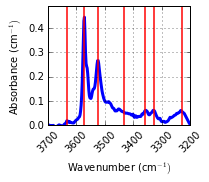

In [63]:
spectrum.make_baseline(curvature=0.1)
spectrum.find_peaks(sensitivity=20)

# Peak fitting
I am unfortunately not aware of any good peak fitting programs currently available in python. The peak fitting program that I use is an open-source program available for Matlab and Octave called [peakfit.m](https://terpconnect.umd.edu/~toh/spectrum/InteractivePeakFitter.htm#command). Another option I am aware of is OpticalFit, which was developed by and is available from CSIRO Australia.

My strategy is as follows:  
1. Make and save the baseline using pynams.
2. Perform a peak fitting routine on the baseline-subtracted spectrum in Matlab using peakfit.m, usually called through this [helper function](https://github.com/EFerriss/pynams/blob/master/matlab_helper_files/FTIR_peakfit_loop.m) that loops through spectra fnames and allows setting individual peak widths and heights.
3. At the end of FTIR_peakfit_loop.m call another matlab function to [save the fit](https://github.com/EFerriss/pynams/blob/master/matlab_helper_files/savefit.m) details as fname-peakfit.CSV
4. Back in python, retrieve the saved peakfit information using pynams.Spectrum.get_peakfit()